Best gamma from CV:  {'gamma': 1.2742749857031321}
Length scale = 0.6264024147269319


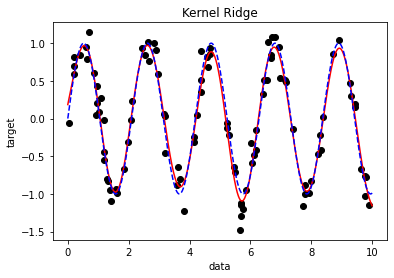

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
 


# ####################
# Generate data
def ytrue(X):
  return np.sin(3*X) # Change here to try other functions
                     # Try for example np.sin(0.1*X)
rng = np.random.RandomState(0)
X = 10 * rng.rand(1000, 1)
y = ytrue(X).ravel() + 0.2 * rng.randn(1000)
X_plot = np.linspace(0, 10, 1000)[:, None]

# ####################
# Fit regression model
train_size = 100 # Change here to try different amounts of data
kr = GridSearchCV(KernelRidge(kernel='rbf',alpha=0.1),
                  param_grid={"gamma": np.logspace(-4, 2, 20)})

kr.fit(X[:train_size], y[:train_size])
y_kr = kr.predict(X_plot)

######################
# Results
print('Best gamma from CV: ',kr.best_params_)
print('Length scale =',1/np.sqrt(2*kr.best_params_['gamma']))
plt.scatter(X[:train_size], y[:train_size], c='k',  zorder=1,
            edgecolors=(0, 0, 0))

plt.plot(X_plot, y_kr, c='r', label='KRR' )
plt.plot(X_plot,ytrue(X_plot),'b--')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Kernel Ridge')

#plt.savefig('kernelridge01.pdf')
plt.show()
#from google.colab import files
#files.download("kernelridge01.pdf")
